In [1]:
#! pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Set the style of seaborn for plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
# For this example, we can use statsmodels' built-in dataset
from statsmodels.datasets import get_rdataset
passengers = get_rdataset('AirPassengers').data
passengers['time'] = pd.date_range(start='1949-01', periods=len(passengers), freq='M')
passengers.set_index('time', inplace=True)
passengers.head()


,value
time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


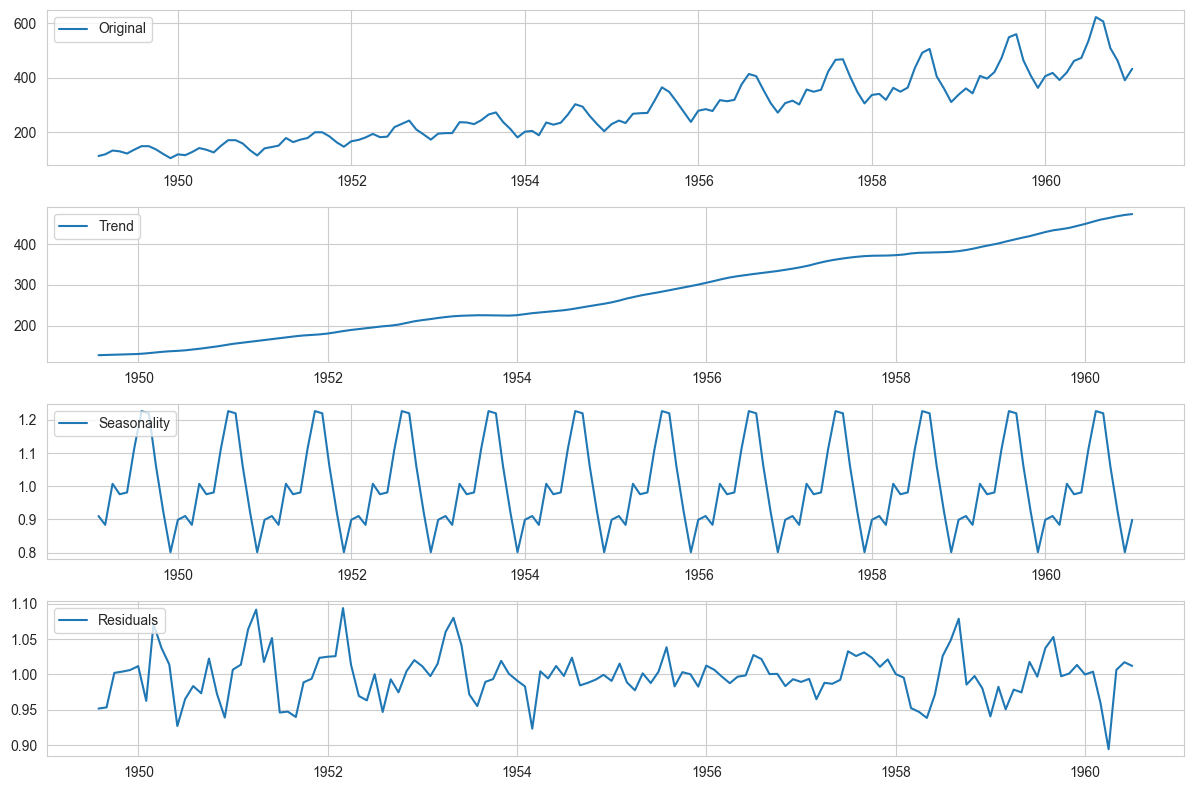

In [3]:
# Decomposition of the time series
decomposition = seasonal_decompose(passengers['value'], model='multiplicative')

# Extracting the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(passengers['value'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()


## Checking for Stationarity

To determine if the time series is stationary, we can use the Augmented Dickey-Fuller (ADF) test. The null hypothesis of the test is that the time series can be represented by a unit root, that is, it is non-stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(passengers['value'])
# adf_test = adfuller(seasonal)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity
if adf_test[1] > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

ADF Statistic: -3516954673062093.000000
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is stationary.


ADF Statistic after differencing: -2.829267
p-value after differencing: 0.054213
Critical Values after differencing:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is still not stationary after differencing.


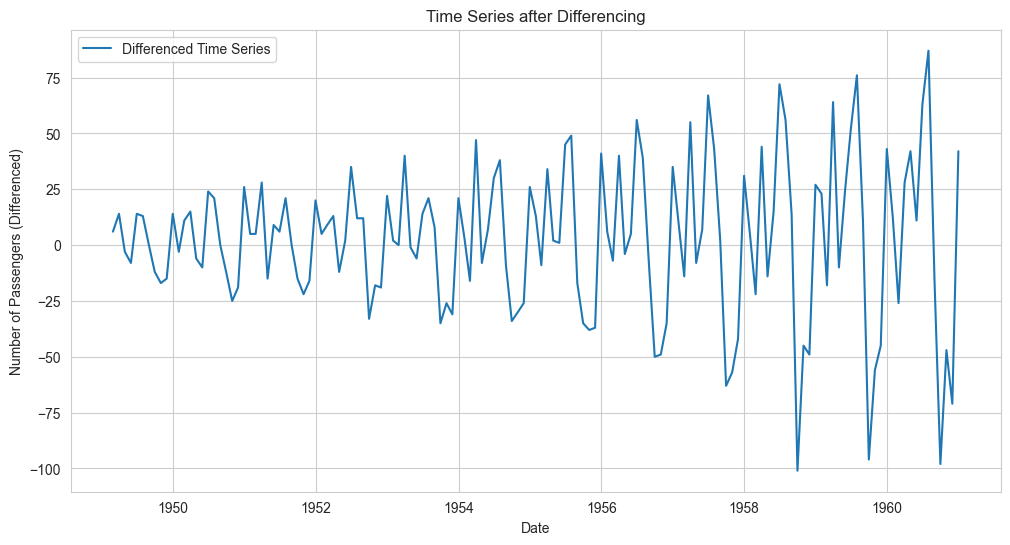

In [5]:
# Applying differencing
passengers_diff = passengers['value'].diff().dropna()

# Perform the ADF test again
adf_test_diff = adfuller(passengers_diff)

print('ADF Statistic after differencing: %f' % adf_test_diff[0])
print('p-value after differencing: %f' % adf_test_diff[1])
print('Critical Values after differencing:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity after differencing
if adf_test_diff[1] > 0.05:
    print("The time series is still not stationary after differencing.")
else:
    print("The time series is stationary after differencing.")

# Plot the differenced time series
plt.figure(figsize=(12,6))
plt.plot(passengers_diff, label='Differenced Time Series')
plt.title('Time Series after Differencing')
plt.xlabel('Date')
plt.ylabel('Number of Passengers (Differenced)')
plt.legend()
plt.show()
